In [29]:
%load_ext autoreload
%autoreload 2

In [72]:
!pip install --upgrade wandb

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.



  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=fe986a535a883d7471c7441e3f41975e6acb9cd9a82f477ae2cbb5db7dd5ea21
  Stored in directory: c:\users\gefre\appdata\local\pip\cache\wheels\29\93\c6\762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6488 sha256=7fdbe8ff1e2f5cad9f1116fd1d572a77a370347f5ac3d5bab305df059f034b64
  Stored in directory: c:\users\gefre\appdata\local\pip\cache\wheels\50\ca\fa\8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
Successfully built promise subprocess32
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.4
    Uninstalling urllib3-1.26.4:
      Successfully uninstalled urllib3-1.26.4


In [73]:
import wandb

In [30]:
from matplotlib import pyplot as plt
from PIL import Image
import os

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

In [37]:
from dataset import Dataset
from models import UNet
from trainer import Trainer
from utils import accuracy
from utils import save_predictions_as_imgs
from utils import hard_dice
from utils import DiceLoss
from utils import make_blending
from utils import BCEDiceLoss
from utils import read_mask

In [74]:
wandb.login()

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\gefre/.netrc


True

In [75]:
train_folder = 'train'
batch_size = 1
device = 'cuda'

train_transforms = A.Compose(
    [
        A.Resize(height=512, width=512),
        #A.Rotate(limit=10, p=1),
        #A.HorizontalFlip(p=0.5),
        #A.VerticalFlip(p=0.5),
        #A.Blur(blur_limit=11, p=1),
        #A.ChannelShuffle(),
        #A.MedianBlur(blur_limit=1, p=1.0),
        #A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0, p=1),
        #A.ColorJitter(),
        # Это реальные среднее и дисперсия выборки, но такая нормализация не сильно помогает
        #tensor([0.8418, 0.8288, 0.8200]), tensor([0.2174, 0.2178, 0.2234]))
        #A.Normalize(mean=([0.8418, 0.8288, 0.8200]), std=([0.2174, 0.2178, 0.2234])),
        #A.Normalize(),
        ToTensorV2()
    ])

train_dataset = Dataset(train_folder, train_transforms)
train_loader =  torch.utils.data.DataLoader(train_dataset, batch_size, pin_memory=True, shuffle=True)

In [78]:
hyperparametrs = {
    'lr': 1e-3,
    'epochs': 8,
    'early_stopping': 10
}

with wandb.init(project='segmentation project', config=hyperparametrs):
    config = wandb.config
    model = UNet(n_filters=32)
    criterion = BCEDiceLoss(0.8)
    metric = {'name' : 'dice', 'func' : hard_dice}
    trainer = Trainer(model, criterion, metric, config)
    trainer.fit(train_loader)

Epoch 1:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 0, loss: 0.41039365936409344,                   dice: 0.7054824964566664


Epoch 2:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 1, loss: 0.34461037475954404,                   dice: 0.7695519490675493


Epoch 3:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 2, loss: 0.31577868353236804,                   dice: 0.7831478254361586


Epoch 4:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 3, loss: 0.291310461407358,                   dice: 0.7955519204789941


Epoch 5:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 4, loss: 0.2758000899444927,                   dice: 0.8086010312492197


Epoch 6:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 5, loss: 0.27149939807978546,                   dice: 0.8061301708221436


Epoch 7:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 6, loss: 0.2517118271101605,                   dice: 0.8235563811930743


Epoch 7: 100%|█████████████████████████████████████████████████████████████████████████| 22/22 [00:12<00:00,  1.78it/s]


Epoch 7, loss: 0.23818688771941446,                   dice: 0.8320114517753775


loss,0.23819
_runtime,103
_timestamp,1626075223
_step,15
dice,0.83201


loss,█▅▄▃▃▂▂▁
_runtime,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
_timestamp,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
_step,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
dice,▁▅▅▆▇▇██


In [4]:
model = UNet(n_filters=32)
#criterion = nn.BCEWithLogitsLoss()
#criterion = DiceLoss()
criterion = BCEDiceLoss(0.8)
metric = {'name' : 'dice', 'func' : hard_dice}
config = {
    'lr': 1e-3,
    'epochs': 8,
    'early_stopping': 10
}
trainer = Trainer(model, criterion, metric, config)

In [6]:
trainer.fit(train_loader)

Epoch 1:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 0, loss: 0.2347697453065352,                   dice: 0.8379833806644786


Epoch 2:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 1, loss: 0.22660080682147632,                   dice: 0.8393654091791674


Epoch 3:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 2, loss: 0.21839279342781415,                   dice: 0.8489335206421939


Epoch 4:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 3, loss: 0.22145953164859253,                   dice: 0.8431620868769559


Epoch 5:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 4, loss: 0.23325447873635727,                   dice: 0.8381647684357383


Epoch 6:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 5, loss: 0.2259618883783167,                   dice: 0.8387022736397657


Epoch 7:   0%|                                                                                  | 0/22 [00:00<?, ?it/s]

Epoch 6, loss: 0.216775004836646,                   dice: 0.8548510481010784


Epoch 7: 100%|█████████████████████████████████████████████████████████████████████████| 22/22 [00:11<00:00,  1.92it/s]

Epoch 7, loss: 0.21476005627350372,                   dice: 0.8505083295432004


In [539]:
save_predictions_as_imgs(train_loader, model)

In [12]:
model.load_state_dict(torch.load(os.path.join(Trainer.CHECKPOINTS_PATH, 'weights.pth')))
save_predictions_as_imgs(train_loader, model)

In [41]:
def show_images_with_mask(number, model_mask=False):
    img_path = './saved_images/orig_' + str(number) + '.png'
    mask_path = ''
    if model_mask == False:
        mask_path = './saved_images/' + str(number) + '.png'
    else:
        mask_path = './saved_images/pred_' + str(number) + '.png'
    plt.figure(figsize=(5, 5))
    blend = make_blending(img_path, mask_path)
    plt.axis('off')
    plt.imshow(blend)

In [66]:
mask_path = './saved_images/pred_6.png'
m_path = './saved_images/6.png'
m2  = read_mask(mask_path)
m1 = read_mask(m_path)

In [67]:
y_true = torch.Tensor(m1)
y_pred = torch.Tensor(m2)

In [68]:
accuracy(y_true, y_pred)

tensor(97.3221)

In [69]:
hard_dice(y_true=y_true, y_pred=y_pred)

tensor(0.8199)

In [70]:
4

5

5

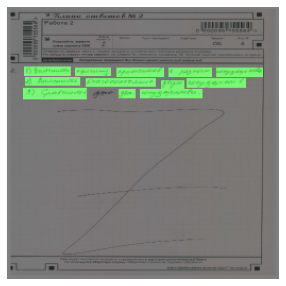

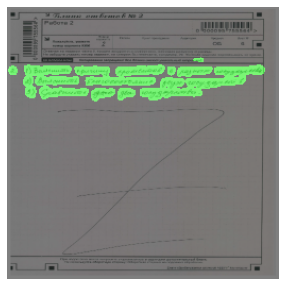

In [71]:
show_images_with_mask(6, False)
show_images_with_mask(6, True)

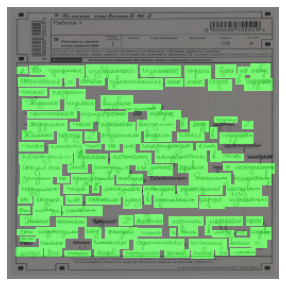

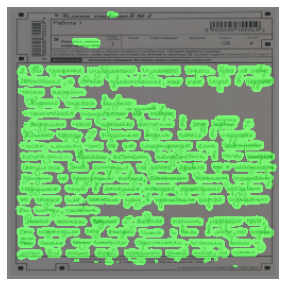